In [528]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [529]:
DataFrame = pd.read_csv("Titanic-Dataset.csv")
DataFrame.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [530]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [531]:
DataFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [532]:
DataFrame.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S


In [533]:
df_isnull = DataFrame.isnull().sum()
df_isnull[df_isnull > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [534]:
DataFrame_New = DataFrame.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1)

In [535]:
df_isnull = DataFrame_New.isnull().sum()
df_isnull[df_isnull > 0]

Age         177
Embarked      2
dtype: int64

In [536]:
DataFrame_New['Age'] = DataFrame_New['Age'].fillna(DataFrame_New['Age'].median())

In [537]:
df_isnull = DataFrame_New.isnull().sum()
df_isnull[df_isnull > 0]

Embarked    2
dtype: int64

In [538]:
DataFrame_New['Embarked'] = DataFrame_New['Embarked'].fillna('unknow')

In [539]:
df_isnull = DataFrame_New.isnull().sum()
df_isnull[df_isnull > 0]

Series([], dtype: int64)

In [540]:
DataFrame_New.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


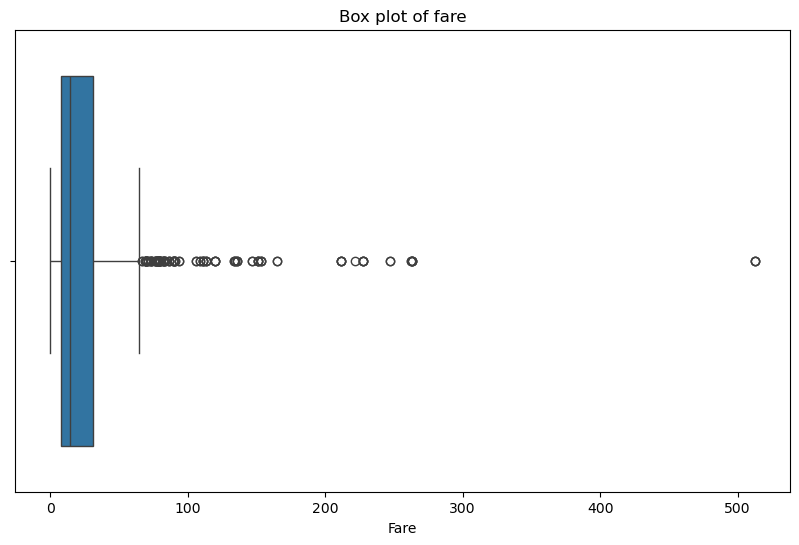

In [541]:
plt.figure(figsize=(10,6))
sns.boxplot(x=DataFrame_New['Fare'])
plt.title("Box plot of fare")
plt.show()

In [542]:
DataFrame_New['Fare_log'] = np.log1p(DataFrame_New['Fare'])

In [543]:
DataFrame_New[['Fare','Fare_log']].head()

,Fare,Fare_log
0,7.2500,2.110213
1,71.2833,4.280593
2,7.9250,2.188856
3,53.1000,3.990834
4,8.0500,2.202765


In [544]:
DataFrame_New['Fare_log'].describe()

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: Fare_log, dtype: float64

In [545]:
DataFrameNew = DataFrame_New.drop(columns=['Fare'],axis=1)

In [546]:
DataFrameNew.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,2.962246
std,0.486592,0.836071,13.019697,1.102743,0.806057,0.969048
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,2.187218
50%,0.000000,3.000000,28.000000,0.000000,0.000000,2.737881
75%,1.000000,3.000000,35.000000,1.000000,0.000000,3.465736
max,1.000000,3.000000,80.000000,8.000000,6.000000,6.240917


In [547]:
scaler = StandardScaler()
DataFrameNew[['Age','Pclass','SibSp','Parch','Fare_log']] = scaler.fit_transform(DataFrameNew[['Age','Pclass','SibSp','Parch','Fare_log']])

In [548]:
DataFrameNew.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare_log
count,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,-8.772133e-17,2.272780e-16,4.386066e-17,5.382900e-17,-1.938841e-16
std,0.486592,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,0.000000,-1.566107e+00,-2.224156e+00,-4.745452e-01,-4.736736e-01,-3.058578e+00
25%,0.000000,-3.693648e-01,-5.657365e-01,-4.745452e-01,-4.736736e-01,-8.002318e-01
50%,0.000000,8.273772e-01,-1.046374e-01,-4.745452e-01,-4.736736e-01,-2.316613e-01
75%,1.000000,8.273772e-01,4.333115e-01,4.327934e-01,-4.736736e-01,5.198636e-01
max,1.000000,8.273772e-01,3.891554e+00,6.784163e+00,6.974147e+00,3.385294e+00


In [549]:
DataFrameNew.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,0.827377,male,-0.565736,0.432793,-0.473674,S,-0.879741
1,1,-1.566107,female,0.663861,0.432793,-0.473674,C,1.361220
2,1,0.827377,female,-0.258337,-0.474545,-0.473674,S,-0.798540
3,1,-1.566107,female,0.433312,0.432793,-0.473674,S,1.062038
4,0,0.827377,male,0.433312,-0.474545,-0.473674,S,-0.784179


In [550]:
DataFrameNew.duplicated().sum()


np.int64(116)

In [551]:
kategori_fitur = DataFrameNew.select_dtypes(include=['object']).columns

In [552]:
df_one_hot = pd.get_dummies(DataFrameNew,columns=kategori_fitur,drop_first=True)
df_one_hot

,Survived,Pclass,Age,SibSp,Parch,Fare_log,Sex_male,Embarked_Q,Embarked_S,Embarked_unknow
0,0,0.827377,-0.565736,0.432793,-0.473674,-0.879741,True,False,True,False
1,1,-1.566107,0.663861,0.432793,-0.473674,1.361220,False,False,False,False
2,1,0.827377,-0.258337,-0.474545,-0.473674,-0.798540,False,False,True,False
3,1,-1.566107,0.433312,0.432793,-0.473674,1.062038,False,False,True,False
4,0,0.827377,0.433312,-0.474545,-0.473674,-0.784179,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369365,-0.181487,-0.474545,-0.473674,-0.333698,True,False,True,False
887,1,-1.566107,-0.796286,-0.474545,-0.473674,0.487082,False,False,True,False
888,0,0.827377,-0.104637,0.432793,2.008933,0.242007,False,False,True,False
889,1,-1.566107,-0.258337,-0.474545,-0.473674,0.487082,True,False,False,False


In [553]:
for column in df_one_hot.columns:
  if df_one_hot[column].dtype == 'bool':
     df_one_hot[column] = df_one_hot[column].astype(int)

In [554]:
missing_values = df_one_hot.isnull().sum()
missing_percentage = (missing_values / len(df_one_hot)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage


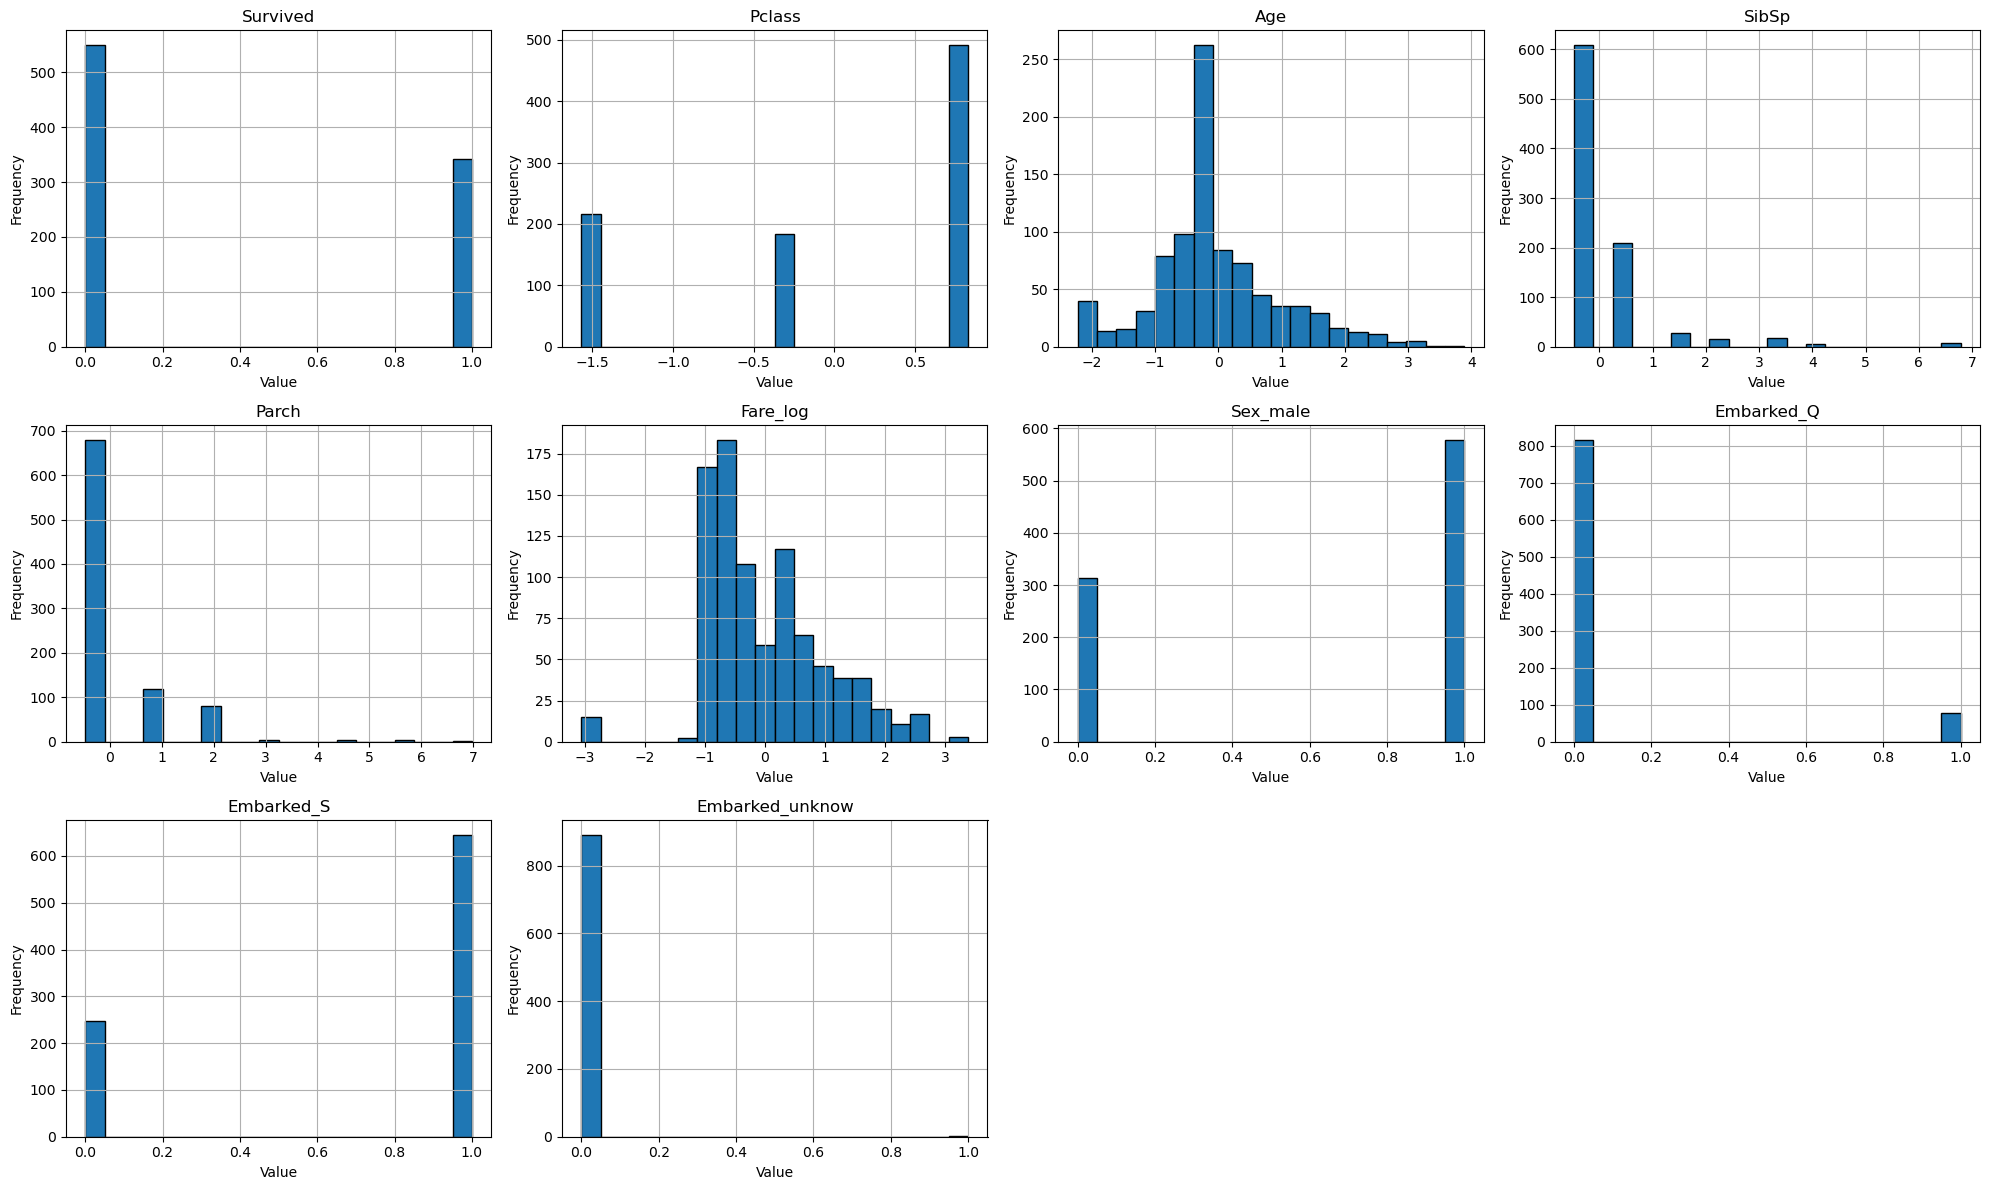

In [555]:
num_vars = df_one_hot.shape[1]

n_cols = 4 
n_rows = -(-num_vars // n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df_one_hot.columns):
    df_one_hot[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

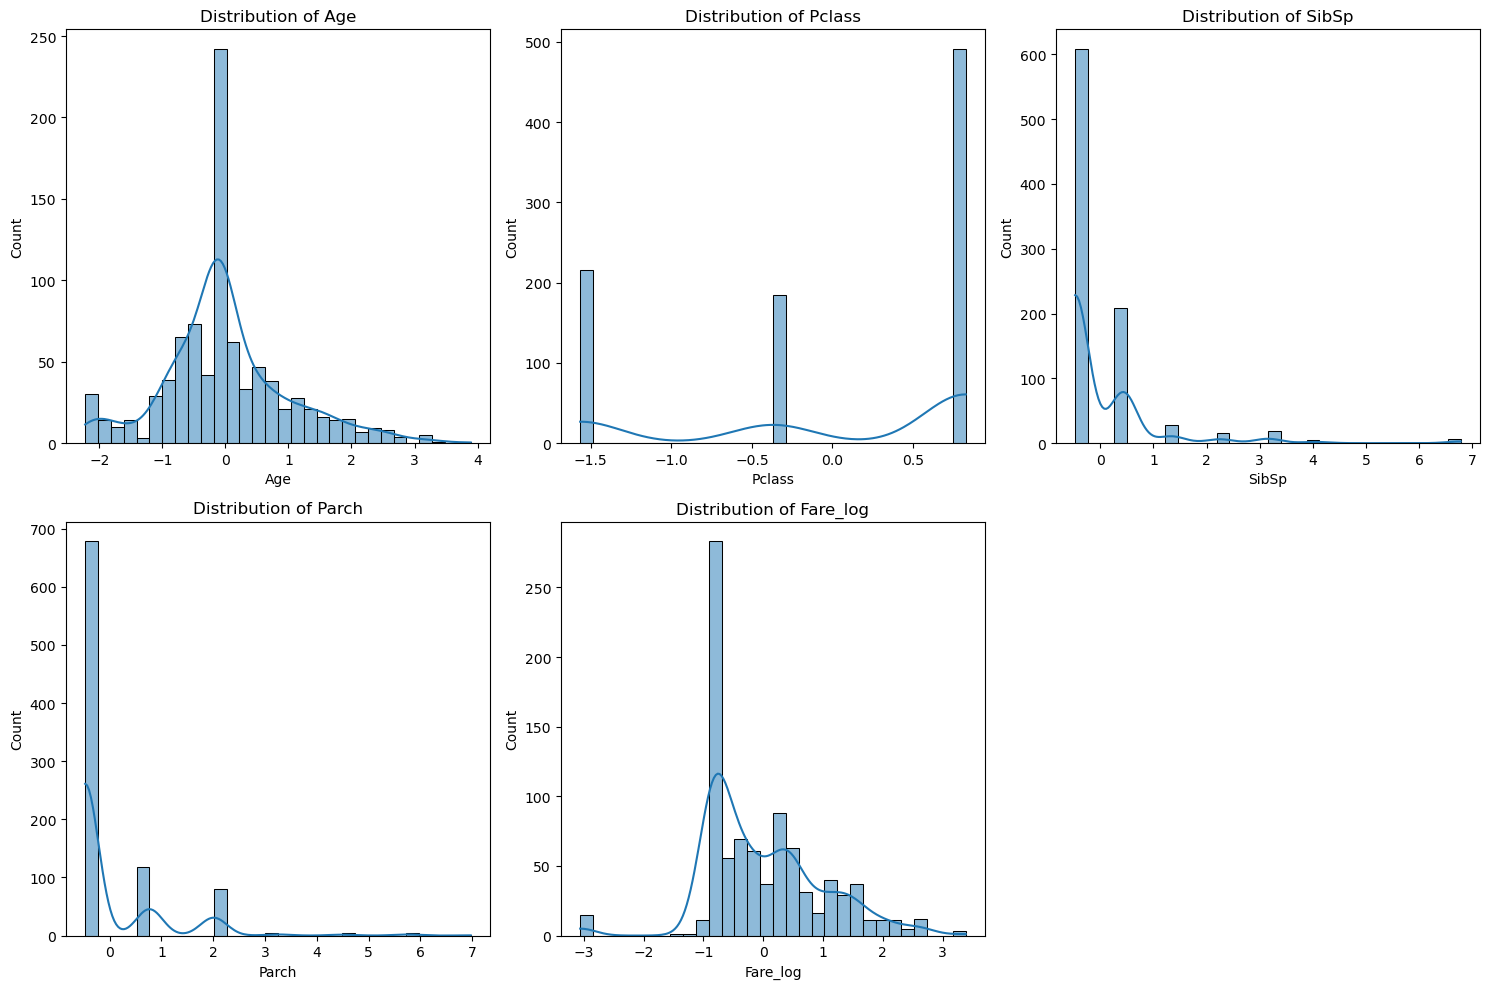

In [556]:
columns_to_plot = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare_log']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_one_hot[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

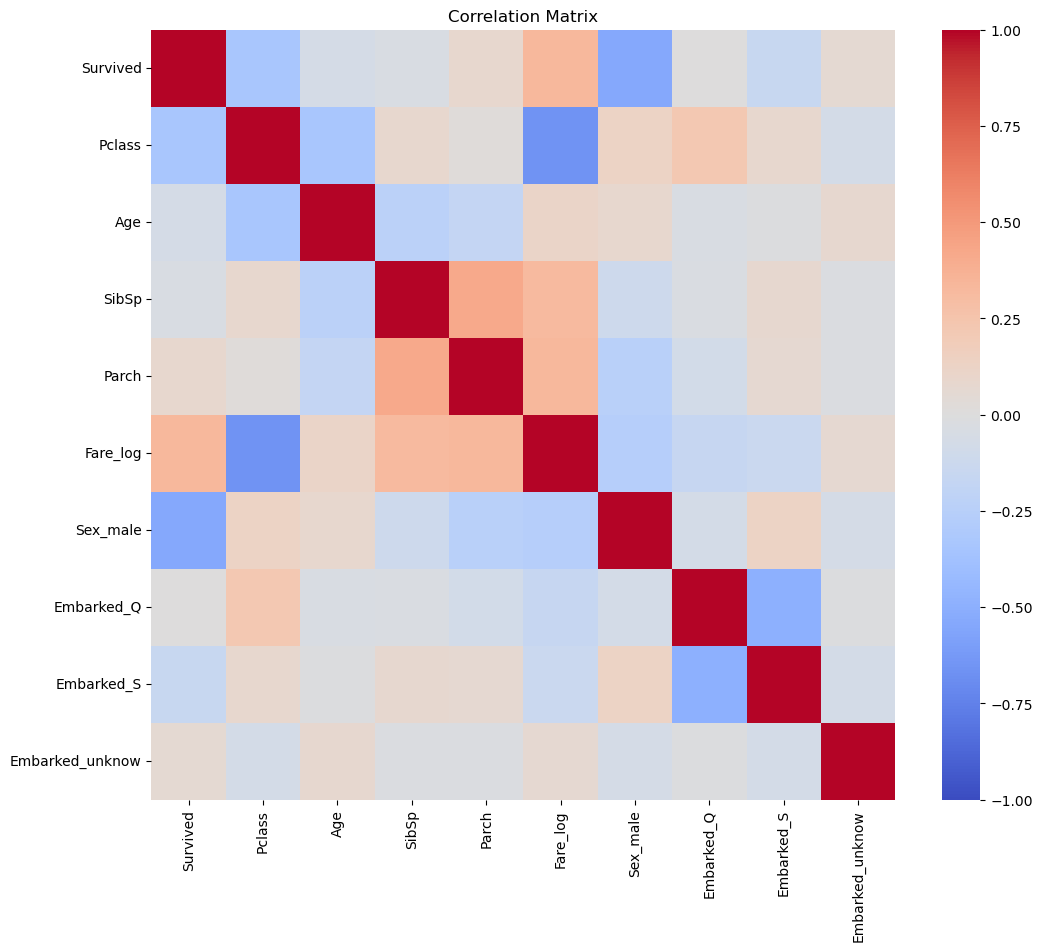

In [557]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_one_hot.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

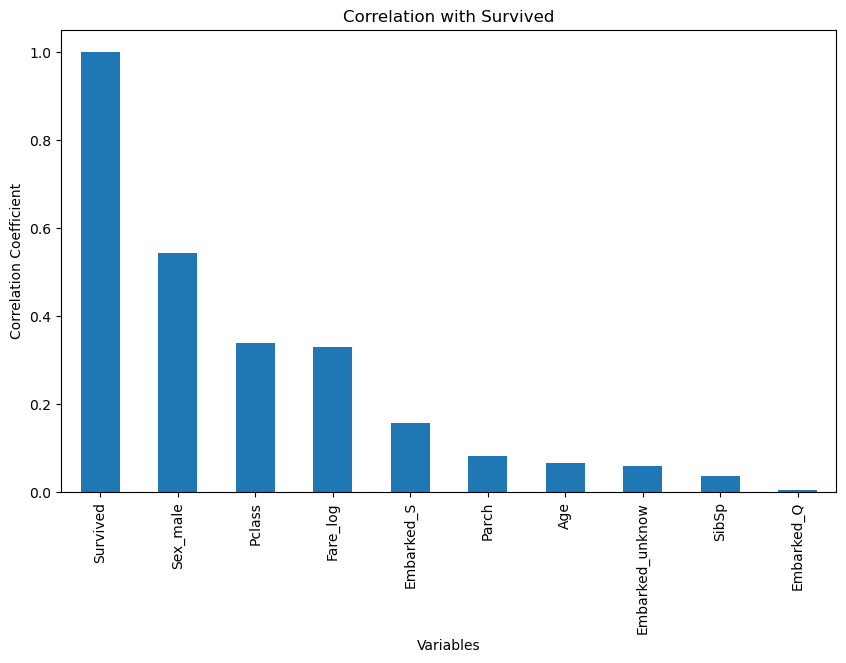

In [558]:
target_corr = df_one_hot.corr()['Survived']

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Survived')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

In [559]:
X = df_one_hot.drop(columns=['Survived'])
y = df_one_hot['Survived']

In [560]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [561]:
print("Jumlah data: ",len(X))
print("Jumlah data latih: ",len(x_train))
print("Jumlah data test: ",len(x_test))

Jumlah data:  891
Jumlah data latih:  712
Jumlah data test:  179


In [562]:
svm = SVC().fit(x_train,y_train)
rf = RandomForestClassifier().fit(x_train, y_train)

==== SVM Classifier ====
Confusion Matrix:
[[96 10]
 [30 43]]
True Positive (TP): 43
False Positive (FP): 10
False Negative (FN): 30
True Negative (TN): 96
Accuracy: 0.7765
Precision: 0.8113
Recall: 0.5890
F1-Score: 0.6825

----------------------------------------



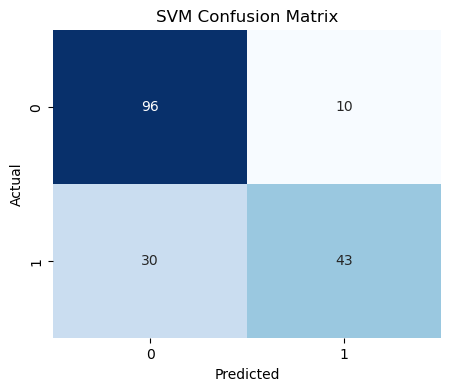

In [563]:
y_pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[96 10]
 [26 47]]
True Positive (TP): 47
False Positive (FP): 10
False Negative (FN): 26
True Negative (TN): 96
Accuracy: 0.7989
Precision: 0.8246
Recall: 0.6438
F1-Score: 0.7231

----------------------------------------



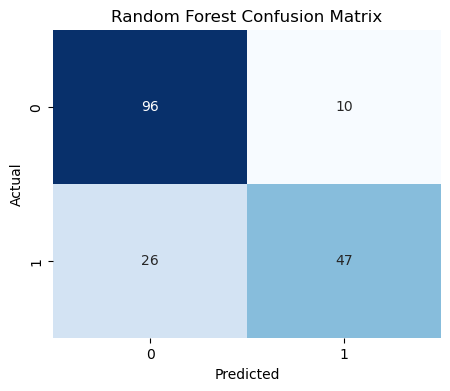

In [564]:
y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()